# Entropy parameters

In this example, the entropy parameters are calculated and used for distinction of solid and liquid. For a description of entropy parameters. 

In [1]:
from pyscal3 import System
import matplotlib.pyplot as plt
import numpy as np

We have two test configurations for Al at 900 K, one is fcc structured and the other one is in liquid state. We calculate the entropy parameters for each of these configurations. First we start by reading in the fcc configuration. For entropy parameters, the values of the integration limit $r_m$ is chosen as 1.4, based on the [original publication](https://aip.scitation.org/doi/10.1063/1.4998408). 

In [2]:
sol = System("conf.fcc.Al.dump")
sol.find.neighbors(method="cutoff", cutoff=0)

The values of $r_m$ is in units of lattice constant, so we need to calculate the lattice constant first. Since is a cubic box, we can do this by,

In [3]:
lat = sol.box[0][0]/5

Now we calculate the entropy parameter and its averaged version. We will use a simple averaging over the neighbors. The `local` keyword allows to use a local density instead of the global one. However, this only works if the neighbors were calculated using a cutoff method.

In [4]:
sol_entropy = sol.calculate.entropy(1.4*lat, average=True, local=True)

Now we can quickly repeat the calculation for the liquid structure.

In [5]:
lqd = System("conf.lqd.Al.dump")
lqd.find.neighbors(method="cutoff", cutoff=0)
lat = lqd.box[0][0]/5
lqd_entropy = lqd.calculate.entropy(1.4*lat, local=True, average=True)

Finally we can plot the results. We can also plot both the non-averaged and averaged versions.

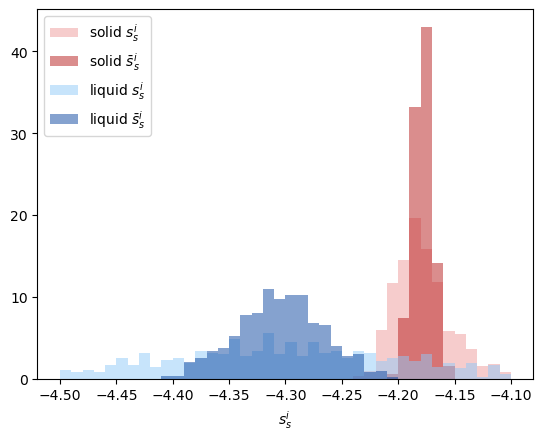

In [10]:
xmin = -4.5
xmax = -4.1
bins = np.arange(xmin, xmax, 0.01)
x = plt.hist(sol.atoms.entropy.norm,  bins=bins, density=True, alpha=0.5, color="#EF9A9A", label=r'solid $s_s^i$')
x = plt.hist(sol_entropy, bins=bins, density=True, alpha=0.5, color="#B71C1C", label=r'solid $\bar{s}_s^i$')
x = plt.hist(lqd.atoms.entropy.norm,  bins=bins, density=True, alpha=0.5, color="#90CAF9", label=r'liquid $s_s^i$')
x = plt.hist(lqd_entropy, bins=bins, density=True, alpha=0.5, color="#0D47A1", label=r'liquid $\bar{s}_s^i$')
plt.xlabel(r"$s_s^i$")
plt.legend();

The distributions of $s_s^i$ given in light red and light blue are fairly distinct but show some overlap. The averaged entropy parameter, $\bar{s}_s^i$ show distinct peaks which can distinguish solid and liquid very well.